In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
import random

In [2]:
# random.randint(a, b)
# Return a random integer N such that a <= N <= b.

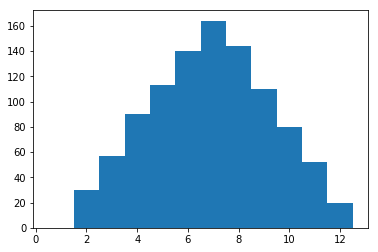

In [3]:
num_runs = 1000
dice_sum = [random.randint(1, 6)+random.randint(1, 6) for _ in range(num_runs)]
offset = 0.5
plt.hist(dice_sum, bins=np.arange(1,np.max(dice_sum)+2)-offset);

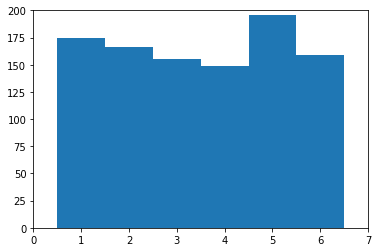

In [27]:
a = die_run_sum(1000)
offset = 0.5
plt.hist(a, bins=np.arange(1,np.max(a)+2)-offset)
plt.axis([0, 7, 0, 200]);

In [4]:
die_A = {1: 2, 2: 2, 3: 4, 4: 4, 5: 9, 6: 9}
die_B = {1: 1, 2: 1, 3: 6, 4: 6, 5: 8, 6: 8}
die_C = {1: 3, 2: 3, 3: 5, 4: 5, 5: 7, 6: 7}

In [5]:
expected_value_a, expected_value_b, expected_value_c = 0, 0, 0
for (v_a, v_b, v_c) in zip(die_A.values(), die_B.values(), die_C.values()):
    expected_value_a += 1/6 * v_a
    expected_value_b += 1/6 * v_b
    expected_value_c += 1/6 * v_c
expected_value_a, expected_value_b, expected_value_c

(5.0, 4.999999999999999, 5.0)

In [6]:
def die_runs(num_runs=100):
    dice_runs = [random.randint(1, 6) for _ in range(num_runs)]
    return dice_runs

def die_run_sum(dice, num_runs=100):
    dice_runs = die_runs(num_runs)
    run_sum = 0
    for value in dice_runs:
        run_sum += dice[value]
    return run_sum

In [7]:
ab_lst, bc_lst, ca_lst = [], [], []
num_rolls_max = 1000
for num_rolls in range(1, num_rolls_max):
    cnt_ab, cnt_bc, cnt_ca = 0, 0, 0
    for _ in range(num_rolls):
        run_a = die_runs(num_runs=1)[0]
        run_b = die_runs(num_runs=1)[0]
        run_c = die_runs(num_runs=1)[0]
        if die_A[run_a] > die_B[run_b]:
            cnt_ab += 1
        if die_B[run_b] > die_C[run_c]:
            cnt_bc += 1
        if die_C[run_c] > die_A[run_a]:
            cnt_ca += 1
    ab_lst.append(cnt_ab/num_rolls)
    bc_lst.append(cnt_bc/num_rolls)
    ca_lst.append(cnt_ca/num_rolls)

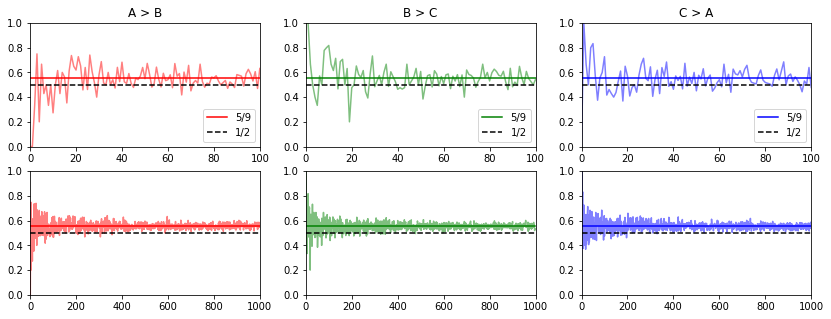

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(14, 5)
ax[0,0].plot(ab_lst, 'r', alpha=.5)
ax[0,0].plot([5/9]*num_rolls_max, 'r-', label='5/9')
ax[0,0].plot([.5]*num_rolls_max, 'k--', label='1/2')
ax[0,0].set_title('A > B')

ax[0,1].plot(bc_lst, 'g', alpha=.5)
ax[0,1].plot([5/9]*num_rolls_max, 'g-', label='5/9')
ax[0,1].plot([.5]*num_rolls_max, 'k--', label='1/2')
ax[0,1].set_title('B > C')

ax[0,2].plot(ca_lst, 'b', alpha=.5)
ax[0,2].plot([5/9]*num_rolls_max, 'b-', label='5/9')
ax[0,2].plot([.5]*num_rolls_max, 'k--', label='1/2')
ax[0,2].set_title('C > A')
for idx in range(3):
    ax[0,idx].set_xlim([0, 100])#num_rolls_max])
    ax[0,idx].set_ylim([0, 1])
    ax[0,idx].legend(loc='lower right')
    
ax[1,0].plot(ab_lst, 'r', alpha=.5)
ax[1,0].plot([5/9]*num_rolls_max, 'r-', label='5/9')
ax[1,0].plot([.5]*num_rolls_max, 'k--', label='1/2')

ax[1,1].plot(bc_lst, 'g', alpha=.5)
ax[1,1].plot([5/9]*num_rolls_max, 'g-', label='5/9')
ax[1,1].plot([.5]*num_rolls_max, 'k--', label='1/2')

ax[1,2].plot(ca_lst, 'b', alpha=.5)
ax[1,2].plot([5/9]*num_rolls_max, 'b-', label='5/9')
ax[1,2].plot([.5]*num_rolls_max, 'k--', label='1/2')
for idx in range(3):
    ax[1,idx].set_xlim([0, num_rolls_max])
    ax[1,idx].set_ylim([0, 1]);
#     ax[1,idx].legend();

## Grime dice

In [51]:
die_red = {1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 9}
die_blue = {1: 2, 2: 2, 3: 2, 4: 7, 5: 7, 6: 7}
die_olive = {1: 0, 2: 5, 3: 5, 4: 5, 5: 5, 6: 5}
die_yellow = {1: 3, 2: 3, 3: 3, 4: 3, 5: 8, 6: 8}
die_magenta = {1: 1, 2: 1, 3: 6, 4: 6, 5: 6, 6: 6}

In [66]:
rb_lst, bo_lst, oy_lst, ym_lst, mr_lst = [], [], [], [], []
num_rolls_max = 500
for num_rolls in range(1, num_rolls_max):
    cnt_rb, cnt_bo, cnt_oy, cnt_ym, cnt_mr = 0, 0, 0, 0, 0
    for _ in range(num_rolls):
        run_r, run_b, run_o, run_y, run_m = die_runs(num_runs=5)
        if die_red[run_r] > die_blue[run_b]:
            cnt_rb += 1
        if die_blue[run_b] > die_olive[run_o]:
            cnt_bo += 1
        if die_olive[run_o] > die_yellow[run_y]:
            cnt_oy += 1
        if die_yellow[run_y] > die_magenta[run_m]:
            cnt_ym += 1
        if die_magenta[run_m] > die_red[run_r]:
            cnt_mr += 1
    rb_lst.append(cnt_rb/num_rolls)
    bo_lst.append(cnt_bo/num_rolls)
    oy_lst.append(cnt_oy/num_rolls)
    ym_lst.append(cnt_ym/num_rolls)
    mr_lst.append(cnt_mr/num_rolls)

No handles with labels found to put in legend.


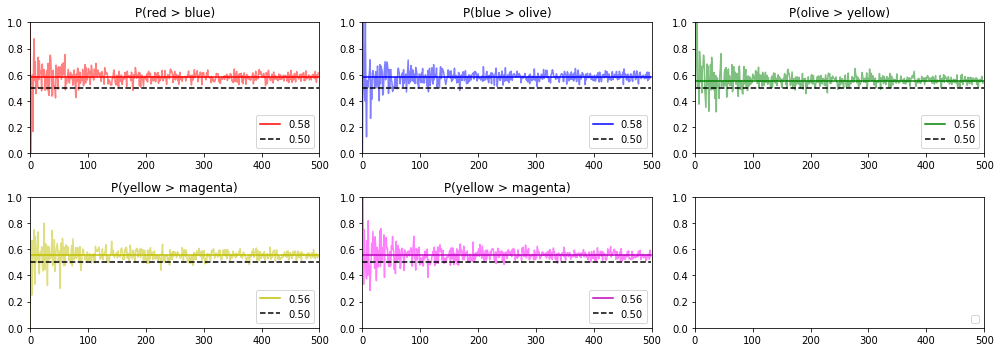

In [86]:
fig, ax = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(14, 5)
ax[0,0].plot(rb_lst, 'r', alpha=.5)
ax[0,0].plot([7/12]*num_rolls_max, 'r-', label='0.58')
ax[0,0].plot([.5]*num_rolls_max, 'k--', label='0.50')
ax[0,0].set_title('P(red > blue)')

ax[0,1].plot(bo_lst, 'b', alpha=.5)
ax[0,1].plot([7/12]*num_rolls_max, 'b-', label='0.58')
ax[0,1].plot([.5]*num_rolls_max, 'k--', label='0.50')
ax[0,1].set_title('P(blue > olive)')

ax[0,2].plot(oy_lst, 'g', alpha=.5)
ax[0,2].plot([5/9]*num_rolls_max, 'g-', label='0.56')
ax[0,2].plot([.5]*num_rolls_max, 'k--', label='0.50')
ax[0,2].set_title('P(olive > yellow)')

ax[1,0].plot(ym_lst, 'y', alpha=.5)
ax[1,0].plot([5/9]*num_rolls_max, 'y-', label='0.56')
ax[1,0].plot([.5]*num_rolls_max, 'k--', label='0.50')
ax[1,0].set_title('P(yellow > magenta)')

ax[1,1].plot(mr_lst, 'magenta', alpha=.5)
ax[1,1].plot([5/9]*num_rolls_max, 'm-', label='0.56')
ax[1,1].plot([.5]*num_rolls_max, 'k--', label='0.50')
ax[1,1].set_title('P(yellow > magenta)')

for idx in range(3):
    ax[0,idx].set_xlim([0, num_rolls_max])
    ax[0,idx].set_ylim([0, 1]);
    ax[0,idx].legend(loc='lower right')
    ax[1,idx].set_xlim([0, num_rolls_max])
    ax[1,idx].set_ylim([0, 1]);
    ax[1,idx].legend(loc='lower right')
plt.tight_layout();

In [73]:
7/12, 5/9

(0.5833333333333334, 0.5555555555555556)

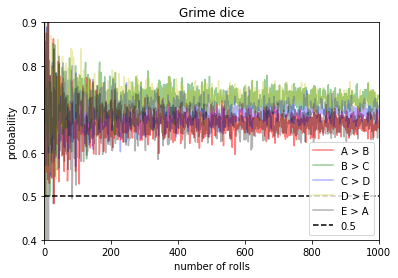

In [119]:
plt.plot(ab_lst, 'r', alpha=.5, label='A > B')
plt.plot(bc_lst, 'g', alpha=.4, label='B > C')
plt.plot(cd_lst, 'b', alpha=.3, label='C > D')
plt.plot(de_lst, 'y', alpha=.3, label='D > E')
plt.plot(ea_lst, 'k', alpha=.3, label='E > A')
plt.plot([.5]*num_rolls_max, 'k--', label='0.5')
plt.title('Grime dice')
plt.xlabel('number of rolls')
plt.ylabel('probability')
plt.axis([0, num_rolls_max, 0.4, 0.9])
plt.legend();